In [0]:
from keras.layers import Input, Dense

from keras.datasets import mnist
import numpy as np



from keras.layers import Input

from keras.models import Model, Sequential

from keras.layers.advanced_activations import LeakyReLU


from keras.datasets import mnist


from keras import initializers






In [0]:




encoder = Sequential()
encoder.add(Dense(256, input_dim= 784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
encoder.add(LeakyReLU(0.2))
encoder
encoder.add(Dense(128))
encoder.add(LeakyReLU(0.2))

encoder.add(Dense(64))
encoder.add(LeakyReLU(0.2))

encoder.compile(optimizer='adadelta', loss='binary_crossentropy')

decoder = Sequential()
decoder.add(Dense(1024, input_dim=64, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
decoder.add(LeakyReLU(0.2))

decoder.add(Dense(128))
decoder.add(LeakyReLU(0.2))
decoder.add(Dense(256))
decoder.add(LeakyReLU(0.2))
decoder.add(Dense(784,activation = 'sigmoid'))






decoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Combined network

combinedInput = Input(shape=(784,))
x = encoder(combinedInput)

#x= concatenate([combinedInput,x])

reconstruction = decoder(x)
autoencoder = Model(inputs=combinedInput, outputs=reconstruction)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [212]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


print(x_train.shape)


(60000, 784)


In [213]:


autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True)

Epoch 1/2
60000/60000 [==============================] - 16s 259us/step - loss: 0.2509
Epoch 2/2
60000/60000 [==============================] - 13s 223us/step - loss: 0.0042


In [0]:

import matplotlib.pyplot as plt


array = [1231,754,892,32,42,1629,123,144,876,92]


(1, 64)


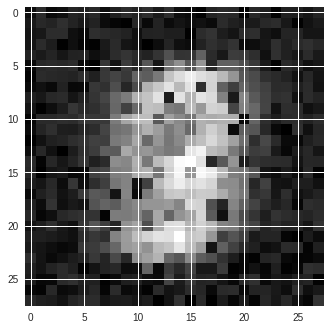

In [215]:
counter = 432
for q in range(1):
  a = x_test[array[0]]
  a2 = x_test[array[9]]
  a.shape = (1,784)

  a2.shape = (1,784)
  b = encoder.predict(a)
  b2 = encoder.predict(a2)
  print(b.shape)

  c = (b - b2)/48
 


  
  for q in range(48):
    h = b2 + c*q



    recons = decoder.predict(h)

    recons.shape = (28,28)

    plt.imshow(recons)
    plt.savefig('./' + str(counter)+'.png')
   
    counter +=1 

Going through all numbers

![alt text](http://gifmaker.org/download/20180804-01-QlSJ3Z1ZA5saNrgJ/GIFMaker.org_f1PlRK.gif)


